# Solving house price prediction Problem from Kaggle.

Problem Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

---
##Basic Initializing
---

Basic **imports** and **mouting**

I am using from google.colab package drives and files modules which help me to mount my dataset downladed from Kaggle and download my generated output using to_csv into a file respectively.

I am using pandas for using the dataframe and its associated operations and also Numpy for Numpy Arrays and their respective operations.

For using various algorithms i.e. DecisionTreeGressor, RandomTreeGressor I am using sklearn's implemented functions. Also, for some part of preprocessing where I have to encode the categorical values into numbers I am have used the LabelEncoder in a function.

For data visualization, I am using matplotlib for generating various graphs and seaborn for generatiing various heatmaps.

In [91]:
from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Loading the data**

I am loading the Training and Testing data in two Pandas DataFrames, naming trainData and testData respectively.

In [92]:
#pd.options.display.max_rows = 4000

location_dataset = "gdrive/My Drive/Datasets/house-prices-advanced-regression-techniques"
location_trainData = location_dataset + "/train.csv"
trainData = pd.read_csv(location_trainData)

location_trainData = location_dataset + "//train.csv"
location_testData = location_dataset + "//test.csv"

trainData = pd.read_csv(location_trainData)
testData = pd.read_csv(location_testData)

newTrainData = trainData.copy(deep=True)
newTestData = testData.copy(deep=True)

#print(type(trainData))

trainLabel = trainData["SalePrice"]

Ids = testData['Id']
Ids = pd.DataFrame(Ids)


tmpShad = ['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'SalePrice']
column_for_heatmap = trainData.columns
i = 0

for field in tmpShad:
  idx = trainData.columns.get_loc(field)
  column_for_heatmap = column_for_heatmap.delete(idx - i)
  i += 1

print(column_for_heatmap)

column_for_heatmap.append(trainData.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       ...
       'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object', length=155)

---
##Pre-processing Starts here
---

I am trying to get some insight about training data here. I can see here the number of null and non-null values here. Also, I can see the the data types that I have to deal with later on before passing it into encoder.

In [93]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

I am trying to visualize the distribution of the Sale Price and extract the mean from here. Also, I am checking whether the amount of outlier that remains in this dataset is ignorable or not.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


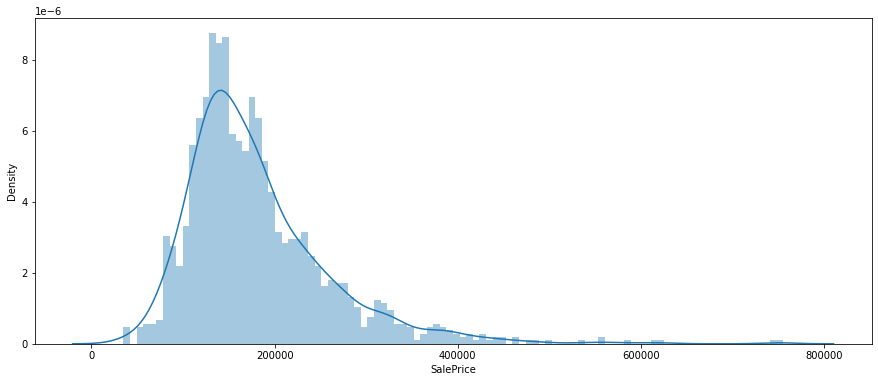

In [94]:
plt.figure(figsize=(15, 6))
sns.distplot(trainData['SalePrice'],bins=100)

Following are my findings in Training Data -
1.   Dependent variable SalePrice has a normal distribution
2.   SalePrice has a mean of around 1,800,000
3.   Very less outliers




**FOR TRAINING DATA**
Dropping Id column, replacing Null values with mean and mode to associated positions as it appears fit.

In [95]:
trainData.drop(['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'SalePrice'], inplace=True, axis=1)

trainData["LotFrontage"] = trainData["LotFrontage"].fillna(trainData["LotFrontage"].mean())
trainData["MasVnrArea"] = trainData["MasVnrArea"].fillna(trainData["MasVnrArea"].mean())

trainData["BsmtQual"] = trainData["BsmtQual"].fillna(trainData["BsmtQual"].mode()[0])
trainData["BsmtCond"] = trainData["BsmtCond"].fillna(trainData["BsmtCond"].mode()[0])
trainData["BsmtExposure"] = trainData["BsmtExposure"].fillna(trainData["BsmtExposure"].mode()[0])
trainData["BsmtFinType1"] = trainData["BsmtFinType1"].fillna(trainData["BsmtFinType1"].mode()[0])
trainData["BsmtFinType2"] = trainData["BsmtFinType2"].fillna(trainData["BsmtFinType2"].mode()[0])
trainData["GarageType"] = trainData["GarageType"].fillna(trainData["GarageType"].mode()[0])
trainData["GarageYrBlt"] = trainData["GarageYrBlt"].fillna(trainData["GarageYrBlt"].mode()[0])
trainData["GarageFinish"] = trainData["GarageFinish"].fillna(trainData["GarageFinish"].mode()[0])
trainData["GarageQual"] = trainData["GarageQual"].fillna(trainData["GarageQual"].mode()[0])
trainData["GarageCond"] = trainData["GarageCond"].fillna(trainData["GarageCond"].mode()[0])
trainData["MasVnrType"] = trainData["MasVnrType"].fillna(trainData["MasVnrType"].mode()[0])
trainData["Electrical"] = trainData["Electrical"].fillna(trainData["Electrical"].mode()[0])

**FOR TESTING DATA** Dropping Id column, replacing Null values with mean and mode to associated positions as it appears fit.

In [96]:
testData.drop(['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True, axis=1)

testData["LotFrontage"] = testData["LotFrontage"].fillna(testData["LotFrontage"].mean())
testData["MasVnrArea"] = testData["MasVnrArea"].fillna(testData["MasVnrArea"].mean())
testData["BsmtFinSF1"] = testData["BsmtFinSF1"].fillna(testData["BsmtFinSF1"].mean())
testData["BsmtFinSF2"] = testData["BsmtFinSF2"].fillna(testData["BsmtFinSF2"].mean())
testData["BsmtUnfSF"] = testData["BsmtUnfSF"].fillna(testData["BsmtUnfSF"].mean())
testData["TotalBsmtSF"] = testData["TotalBsmtSF"].fillna(testData["TotalBsmtSF"].mean())
testData["GarageArea"] = testData["GarageArea"].fillna(testData["GarageArea"].mean())

testData["BsmtQual"] = testData["BsmtQual"].fillna(testData["BsmtQual"].mode()[0])
testData["BsmtCond"] = testData["BsmtCond"].fillna(testData["BsmtCond"].mode()[0])
testData["BsmtExposure"] = testData["BsmtExposure"].fillna(testData["BsmtExposure"].mode()[0])
testData["BsmtFinType1"] = testData["BsmtFinType1"].fillna(testData["BsmtFinType1"].mode()[0])
testData["BsmtFinType2"] = testData["BsmtFinType2"].fillna(testData["BsmtFinType2"].mode()[0])
testData["GarageType"] = testData["GarageType"].fillna(testData["GarageType"].mode()[0])
testData["GarageYrBlt"] = testData["GarageYrBlt"].fillna(testData["GarageYrBlt"].mode()[0])
testData["GarageFinish"] = testData["GarageFinish"].fillna(testData["GarageFinish"].mode()[0])
testData["GarageQual"] = testData["GarageQual"].fillna(testData["GarageQual"].mode()[0])
testData["GarageCond"] = testData["GarageCond"].fillna(testData["GarageCond"].mode()[0])
testData["MasVnrType"] = testData["MasVnrType"].fillna(testData["MasVnrType"].mode()[0])
testData["Electrical"] = testData["Electrical"].fillna(testData["Electrical"].mode()[0])
testData["MSZoning"] = testData["MSZoning"].fillna(testData["MSZoning"].mode()[0])
testData["Utilities"] = testData["Utilities"].fillna(testData["Utilities"].mode()[0])
testData["Exterior1st"] = testData["Exterior1st"].fillna(testData["Exterior1st"].mode()[0])
testData["Exterior2nd"] = testData["Exterior2nd"].fillna(testData["Exterior2nd"].mode()[0])
testData["BsmtFullBath"] = testData["BsmtFullBath"].fillna(testData["BsmtFullBath"].mode()[0])
testData["BsmtHalfBath"] = testData["BsmtHalfBath"].fillna(testData["BsmtHalfBath"].mode()[0])
testData["KitchenQual"] = testData["KitchenQual"].fillna(testData["KitchenQual"].mode()[0])
testData["Functional"] = testData["Functional"].fillna(testData["Functional"].mode()[0])
testData["GarageCars"] = testData["GarageCars"].fillna(testData["GarageCars"].mode()[0])
testData["SaleType"] = testData["SaleType"].fillna(testData["SaleType"].mode()[0])

**Label Encoder Function** for encoding the categorical data of the dataset

Merging trainData and testData

In [97]:
df_to_merge = [trainData, testData]

totalData = pd.concat(df_to_merge)
#totalData.info()

In [98]:
def encode_data(data):
    columns = list(data.select_dtypes(['object']).columns)
    x = data.iloc[:, :].values
    label_enc = LabelEncoder()
    rows = data.shape[0]

    for field in columns:
        #print(field)
        index_column = data.columns.get_loc(field)
        tmp = np.array(['shad' for _ in range(rows)])
        for i in range(rows):
            tmp[i] = x[:, index_column:index_column + 1][i][0]
        tmp = label_enc.fit_transform(tmp)
        tmp = np.reshape(tmp, (-1, 1))
        x[:, index_column:index_column + 1] = tmp

    return x

**Encoding** Training and Testing Data

In [99]:
totalData = encode_data(totalData)

totalData = pd.DataFrame(totalData)

trainData = totalData[:1460]
testData = totalData[1460:]

print(trainData)

#np.savetxt("shad.csv", trainData, delimiter=",")

#print(trainLabel)

      0  1   2      3  4  5  6  7  8   ...   65 66 67 68    69  70    71 72 73
0     60  3  65   8450  1  3  3  0  4  ...    0  0  0  0     0   2  2008  6  4
1     20  3  80   9600  1  3  3  0  2  ...    0  0  0  0     0   5  2007  6  4
2     60  3  68  11250  1  0  3  0  4  ...    0  0  0  0     0   9  2008  6  4
3     70  3  60   9550  1  0  3  0  0  ...  272  0  0  0     0   2  2006  6  0
4     60  3  84  14260  1  0  3  0  2  ...    0  0  0  0     0  12  2008  6  4
...   .. ..  ..    ... .. .. .. .. ..  ...  ... .. .. ..   ...  ..   ... .. ..
1455  60  3  62   7917  1  3  3  0  4  ...    0  0  0  0     0   8  2007  6  4
1456  20  3  85  13175  1  3  3  0  4  ...    0  0  0  0     0   2  2010  6  4
1457  70  3  66   9042  1  3  3  0  4  ...    0  0  0  0  2500   5  2010  6  4
1458  20  3  68   9717  1  3  3  0  4  ...  112  0  0  0     0   4  2010  6  4
1459  20  3  75   9937  1  3  3  0  4  ...    0  0  0  0     0   6  2008  6  4

[1460 rows x 74 columns]


Trying to find if there remains any correlation among the variables with a Heatmap

Here I am trying to generate the correlationg matrix and find out all the variables that has a correlation score above 0.7.

      MSSubClass  MSZoning  LotFrontage  ...  YrSold  SaleType  SaleCondition
0           60.0       3.0         65.0  ...  2008.0       6.0            4.0
1           20.0       3.0         80.0  ...  2007.0       6.0            4.0
2           60.0       3.0         68.0  ...  2008.0       6.0            4.0
3           70.0       3.0         60.0  ...  2006.0       6.0            0.0
4           60.0       3.0         84.0  ...  2008.0       6.0            4.0
...          ...       ...          ...  ...     ...       ...            ...
1455        60.0       3.0         62.0  ...  2007.0       6.0            4.0
1456        20.0       3.0         85.0  ...  2010.0       6.0            4.0
1457        70.0       3.0         66.0  ...  2010.0       6.0            4.0
1458        20.0       3.0         68.0  ...  2010.0       6.0            4.0
1459        20.0       3.0         75.0  ...  2008.0       6.0            4.0

[1460 rows x 74 columns]
************************************
M

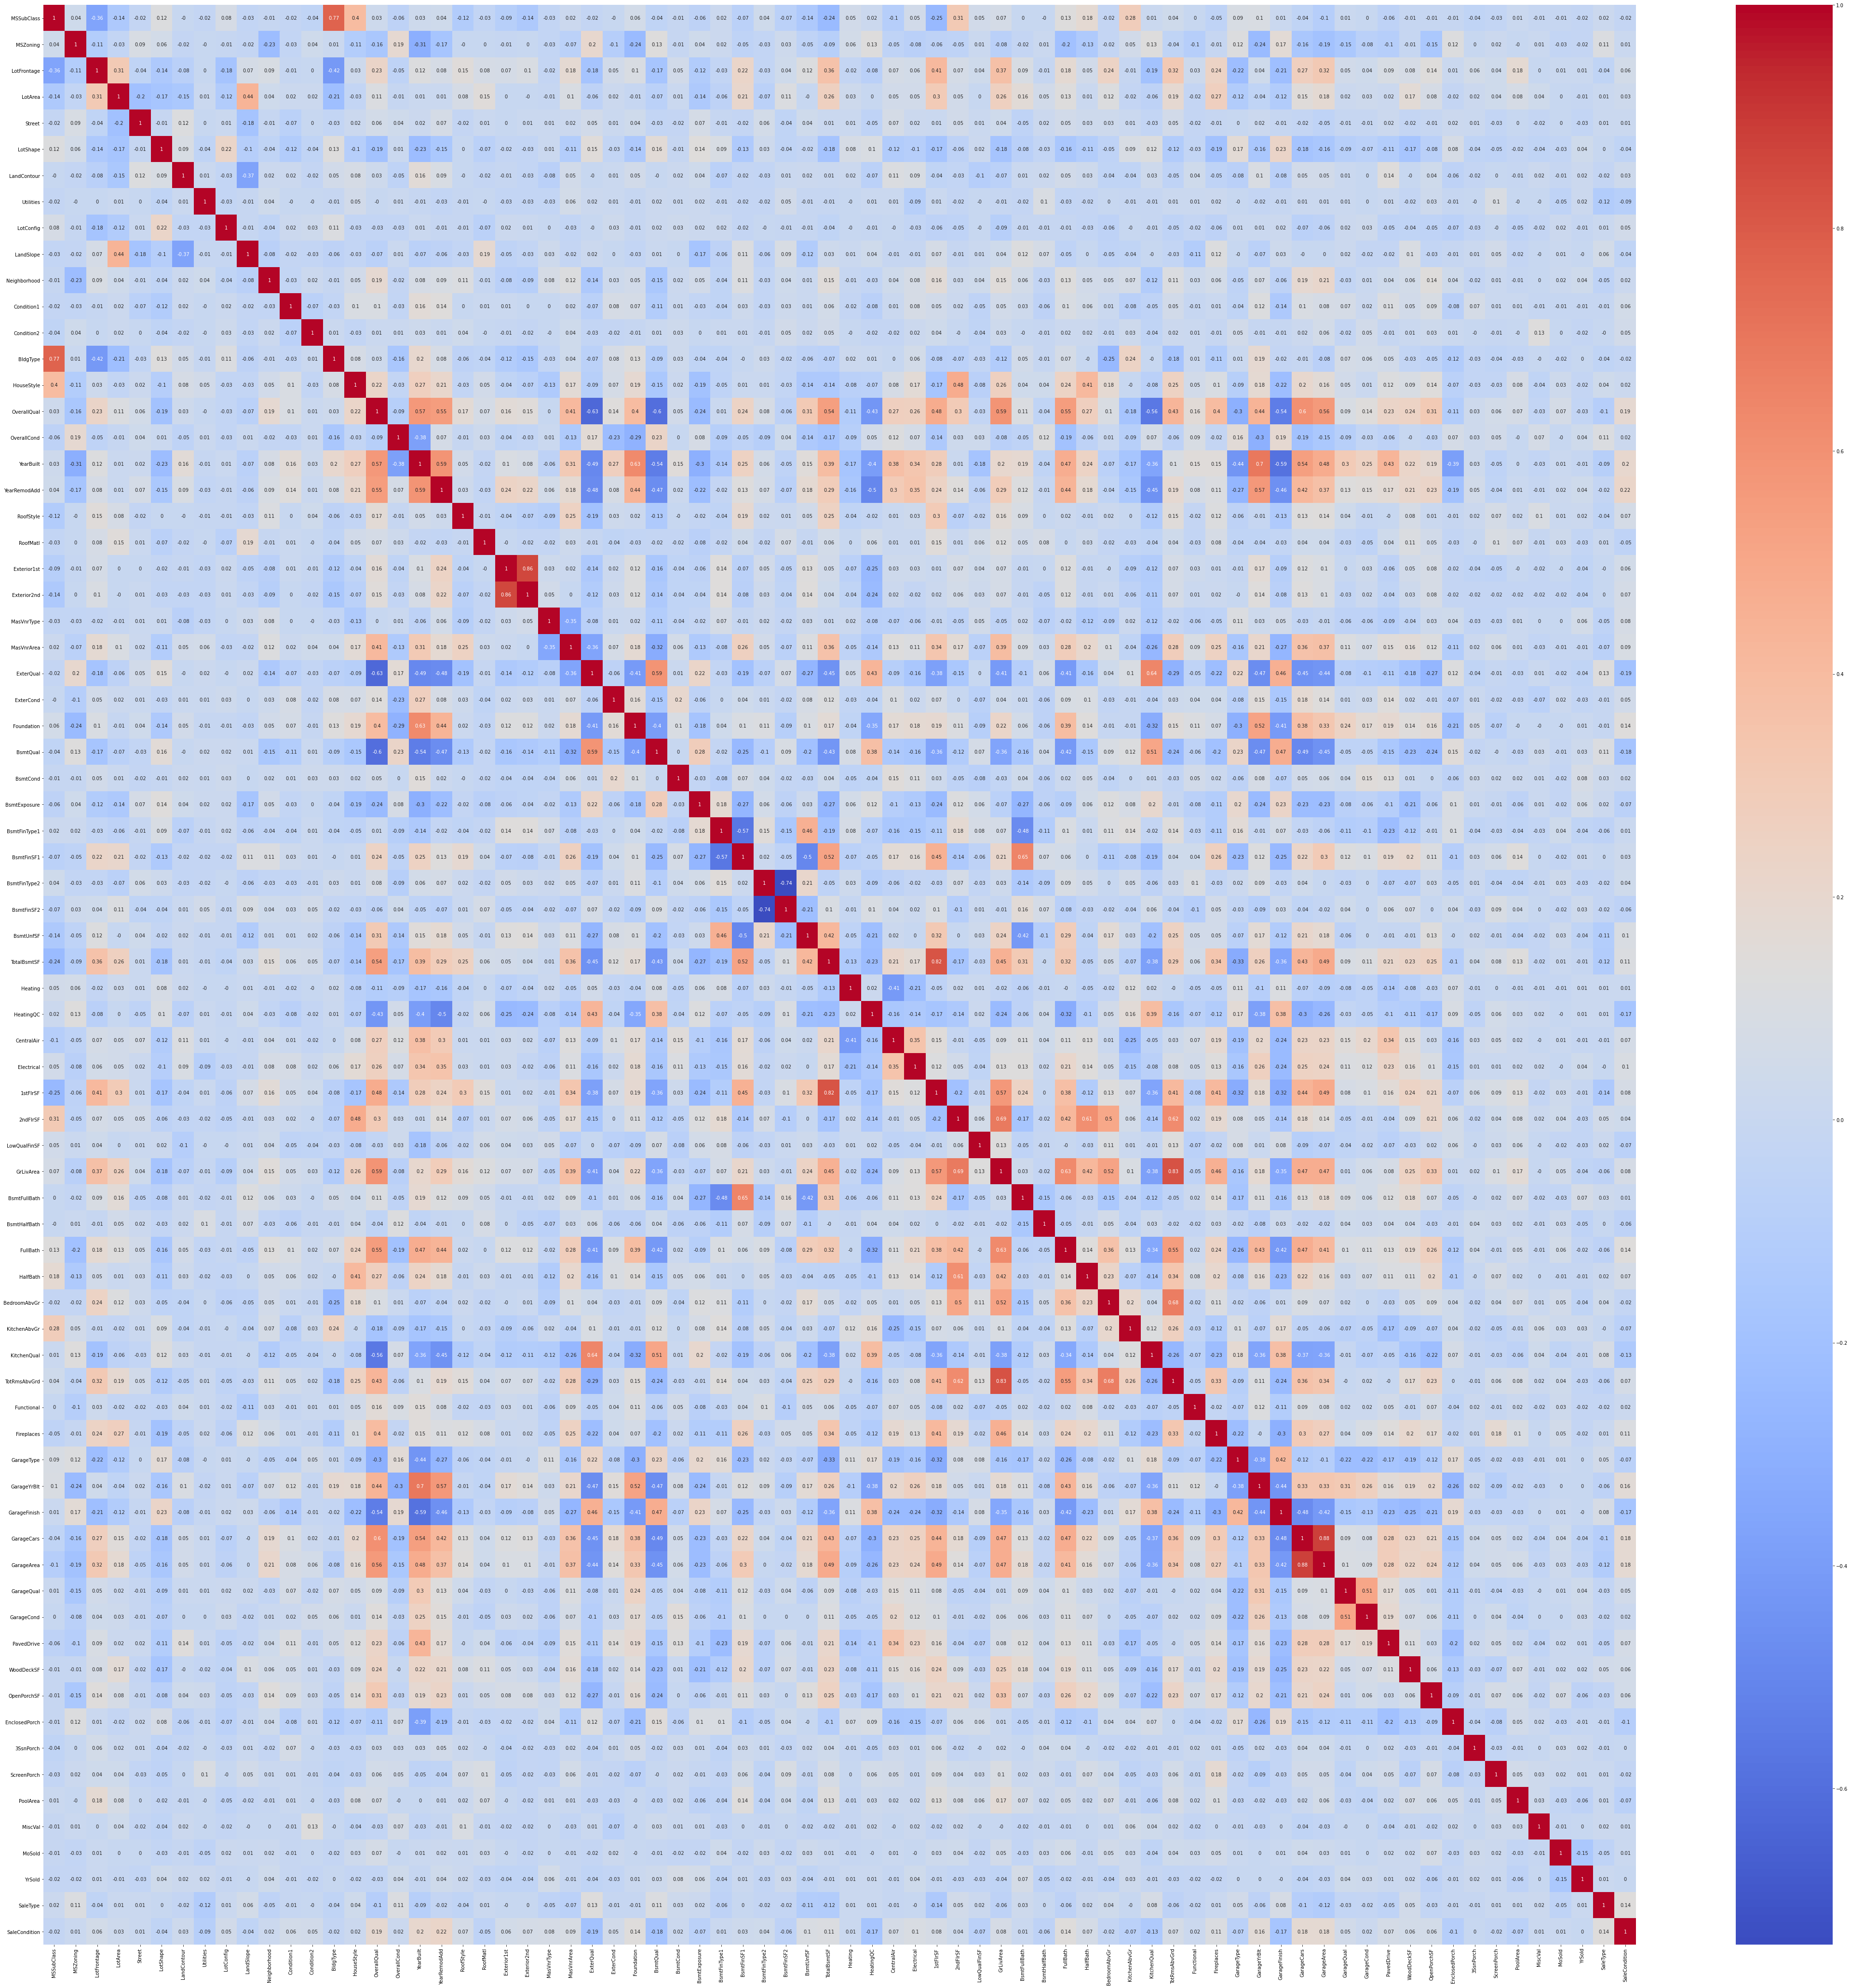

In [100]:
column_for_heatmap = column_for_heatmap

#print(column_for_heatmap)
tmpTrainData = pd.DataFrame(np.asarray(trainData), columns=column_for_heatmap, dtype=float)

print(tmpTrainData)

plt.figure(figsize=(74, 74))
corr_matrix = tmpTrainData.corr().round(2)

#print(corr_matrix)

for col in column_for_heatmap:
  i = 0
  print("************************************")
  print(str(col) + " is related with: ")
  for i in range(74):
    #print("*******************")
    #print("index = " + str(i))
    if( (corr_matrix[str(col)][i] >= 0.7) and (corr_matrix[str(col)][i] != 1.0)):
      print(column_for_heatmap[i])
  
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=True)

**Conclusion (above or equal 70% similarities):**

MSSubClass is related with: 
BldgType

YearBuilt is related with: 
GarageYrBlt

Exterior1st is related with: 
Exterior2nd

TotalBsmtSF is related with: 
1stFlrSF

GrLivArea is related with: 
TotRmsAbvGrd

GarageYrBlt is related with: 
YearBuilt

GarageCars is related with: 
GarageArea

"\nplot2 = plt.figure(2)\nplt.scatter(df_raw_train['LSTAT'],target_var)\nplt.xlabel('LSTAT')\nplt.ylabel('MEDV')\n"

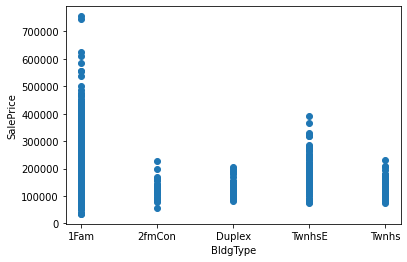

In [101]:
target_var = newTrainData['SalePrice']

plot1 = plt.figure(1)
plt.scatter(newTrainData['BldgType'], newTrainData['SalePrice'])
plt.xlabel('BldgType')
plt.ylabel('SalePrice')

'''
plot2 = plt.figure(2)
plt.scatter(df_raw_train['LSTAT'],target_var)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
'''

---
##Model Training Starts here
---
I am taking a RandomForestRegressor with 100 trees and activating the parallel processing here.

Note to self: oob_score is the prediction score with unseen instances from the DTs after the training is done with bootstraps.


In [102]:
shad_tmp = newTrainData['SalePrice']
dip = pd.DataFrame(trainData, dtype=float)
dip[74] = shad_tmp

dip_test = pd.DataFrame(testData, dtype=float)

In [103]:
dip[74]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: 74, Length: 1460, dtype: int64

###**Hyper-parameter Tuning**

In [104]:
from sklearn.model_selection import RandomizedSearchCV

# A function to split our training data into a training set to train our  model and a validations set, which will be used to validate our model.
def split_vals(a,n):
  return a[:n],a[n:]

# Functions that will help us calculate the RMSE and print the score.
def rmse(x,y):
  return math.sqrt(((x-y)**2).mean())

def print_score(m):
  res =[rmse(m.predict(X_train),y_train),rmse(m.predict(X_valid),y_valid),m.score(X_train,y_train),m.score(X_valid,y_valid)]
  if hasattr(m,'oob_score_'):
    res.append(m.oob_score_)
    print(res)

n_valid = 400
n_train = len(dip)-n_valid
X_train,X_valid = split_vals(dip.drop([74],axis=1),n_train)
y_train,y_valid = split_vals(dip[74],n_train)
X_test = dip_test


n_estimators = [int(x) for x in np.arange(start = 10, stop = 2000, step = 10)]
max_features = [0.5,'auto', 'sqrt','log2']
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}# First create the base model to tune
m = RandomForestRegressor()
# Fit the random search model
m_random = RandomizedSearchCV(estimator = m, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
m_random.fit(X_train, y_train)
m_random.best_params_


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 20.1min finished


{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 1830}

###Finding out the most important feature to consider

In [105]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)

def feat_importance(m,df_train):
    importance = m.feature_importances_
    importance = pd.DataFrame(importance,index=df_train.columns,columns=["Importance"])
    return importance.sort_values(by=['Importance'],ascending=False)
    
importance = feat_importance(m,X_train)
importance[:]
#plt.figure(figsize=(100, 100))
#importance.plot(kind='barh')

,Importance
15,5.827526e-01
44,1.157111e-01
36,3.680721e-02
32,2.689502e-02
41,2.651495e-02
...,...
61,7.369574e-05
37,6.915776e-05
4,1.041222e-05
68,1.272338e-07


So, our most optimized hyper-parameter setting will be the following- 

** {'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 1830} ** 

In [106]:
print(y_train)
print(y_valid)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1055    180000
1056    185850
1057    248000
1058    335000
1059    220000
Name: 74, Length: 1060, dtype: int64
1060    213500
1061     81000
1062     90000
1063    110500
1064    154000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: 74, Length: 400, dtype: int64


###Using the best setting for making our final prediction

In [108]:
#model = DecisionTreeRegressor()
model = RandomForestRegressor(n_estimators=1830, min_samples_leaf=1, n_jobs=-1, max_features='sqrt', bootstrap=False)
model.fit(X_train, y_train)
sale_prices_predicted = model.predict(dip_test)

out = pd.DataFrame(sale_prices_predicted)
ds=pd.concat([Ids, out], axis=1)
ds.columns=['Id', 'SalePrice']
#ds.to_csv('1. DT_sample_submission.csv', index=False)
print(ds.head())
ds.to_csv('5. Merged Encoded and Optimized RF_sample_submission_v0.3.csv', index=False)
files.download('5. Merged Encoded and Optimized RF_sample_submission_v0.3.csv')

     Id      SalePrice
0  1461  126226.051366
1  1462  150096.917486
2  1463  184160.010929
3  1464  187493.193989
4  1465  192935.726776


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>